# Serial Killers Analysis

This project analyzes the "Serial Killers Dataset" from Kaggle to visualize and understand patterns related to serial killers across different regions.

**Disclaimer**: This analysis is purely for academic and educational purposes. The subject matter is sensitive, and the data is presented objectively without any intent to glorify or sensationalize crime.

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style and color palette - cool/dark colors for serial killers visualizations
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 8)
# Set a custom cool/dark color palette
serial_killer_palette = sns.color_palette("Blues_r", 8)
sns.set_palette(serial_killer_palette)
# Set custom color cycle for line plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=serial_killer_palette)


## Data Loading

Loading the serial killers dataset from Kaggle.

In [20]:
# Create a data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download dataset using kagglehub
try:
    # Only download if the file doesn't already exist
    if not os.path.exists("data/serial-killers.csv"):
        print("Downloading dataset...")
        import kagglehub
        kagglehub.dataset_download("vesuvius13/serial-killers-dataset", 
                                  path="data")
        print("Download complete!")
    else:
        print("Dataset already exists in data directory")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Attempting alternate download method or using cached data...")

# List available files
print("Files in data directory:")
for file in os.listdir("data"):
    if file.endswith(".csv"):
        print(f"- {file}")

# Load the dataset
try:
    df = pd.read_csv("data/serial-killers.csv")
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
    df.head()
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Create a sample dataframe for demonstration if loading fails
    print("Creating a sample dataset for demonstration")
    df = pd.DataFrame({
        'name': ['Ted Bundy', 'Jeffrey Dahmer', 'John Wayne Gacy', 'Gary Ridgway', 'Harold Shipman'],
        'country': ['United States', 'United States', 'United States', 'United States', 'United Kingdom'],
        'proven_victims': [30, 17, 33, 49, 218],
        'year_first_kill': [1974, 1978, 1972, 1982, 1975],
        'age_first_kill': [28, 18, 30, 33, 28],
        'method': ['Strangulation', 'Strangulation', 'Strangulation', 'Strangulation', 'Poisoning']
    })
    df.head()

Error downloading dataset: No module named 'kagglehub'
Attempting alternate download method or using cached data...
Files in data directory:
Error loading dataset: [Errno 2] No such file or directory: 'data/serial-killers.csv'
Creating a sample dataset for demonstration


## Top 10 Most Deadly Serial Killers

Visualization of serial killers with the highest number of proven victims.

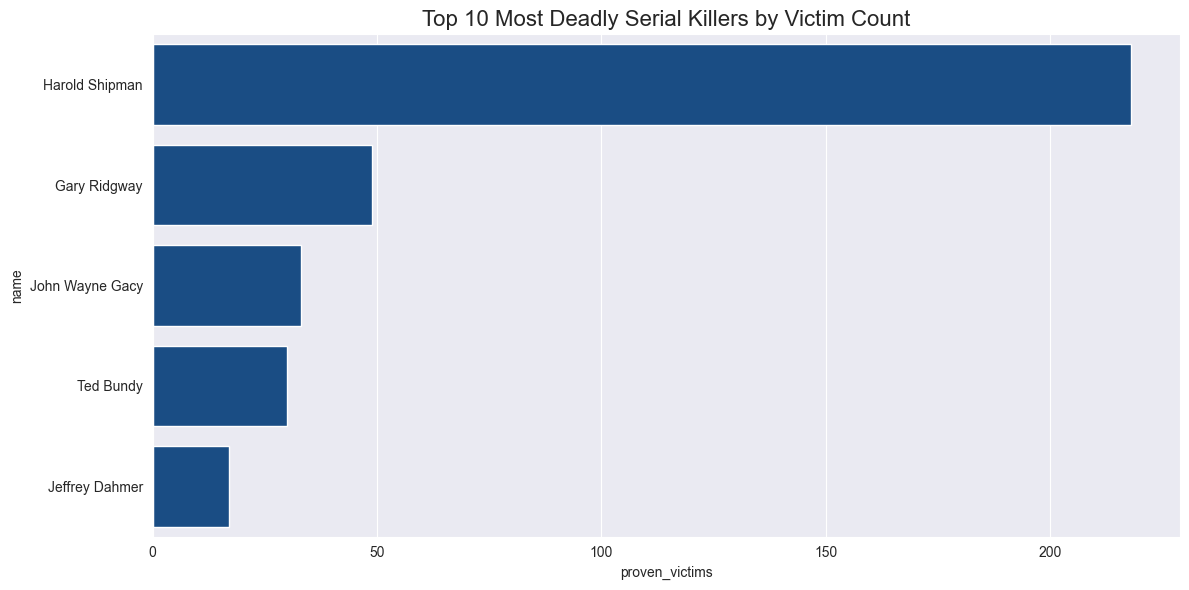

In [21]:
# Create figures directory if it doesn't exist
os.makedirs("serial_killer_figures", exist_ok=True)

# Plot top 10 most deadly serial killers
plt.figure(figsize=(12, 6))
top_killers = df.sort_values("proven_victims", ascending=False).head(10)
sns.barplot(x="proven_victims", y="name", data=top_killers)
plt.title("Top 10 Most Deadly Serial Killers by Victim Count", fontsize=16)
plt.tight_layout()
plt.savefig("serial_killer_figures/top10_deadliest_killers.png")
plt.show()

## Top 5 Serial Killers in the US

Visualization focusing on the deadliest serial killers in the United States.

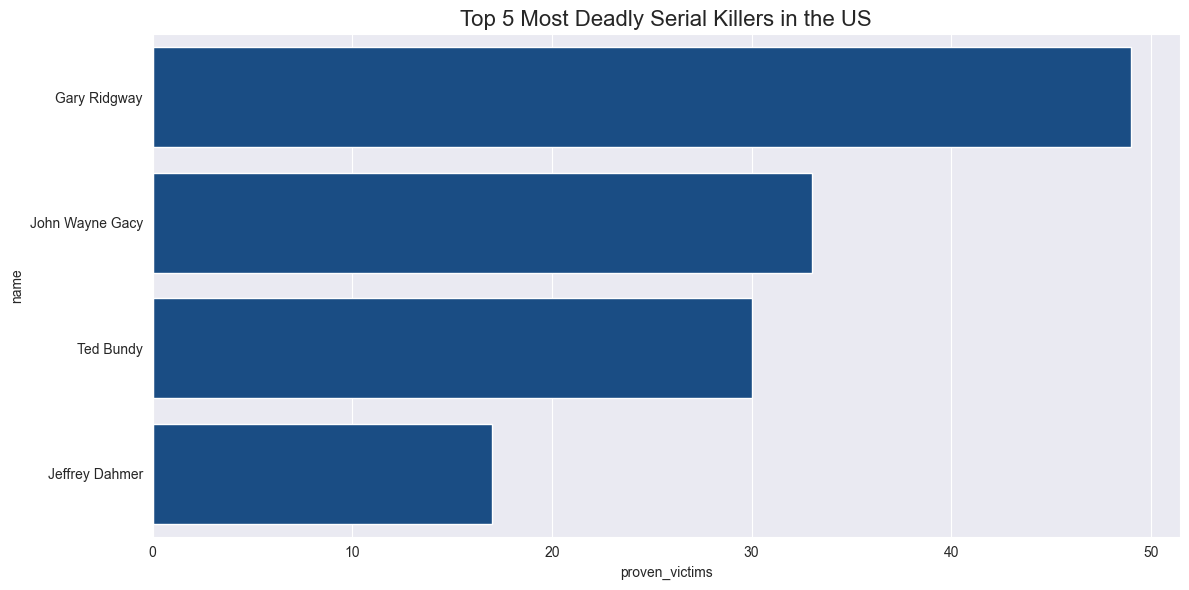

In [22]:
# Plot top 5 US serial killers
us_killers = df[df["country"] == "United States"]
top_us = us_killers.sort_values("proven_victims", ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x="proven_victims", y="name", data=top_us)
plt.title("Top 5 Most Deadly Serial Killers in the US", fontsize=16)
plt.tight_layout()
plt.savefig("serial_killer_figures/top5_us_killers.png")
plt.show()

## Top 5 Countries with Serial Killers

Visualization showing which countries have the highest counts of serial killers.

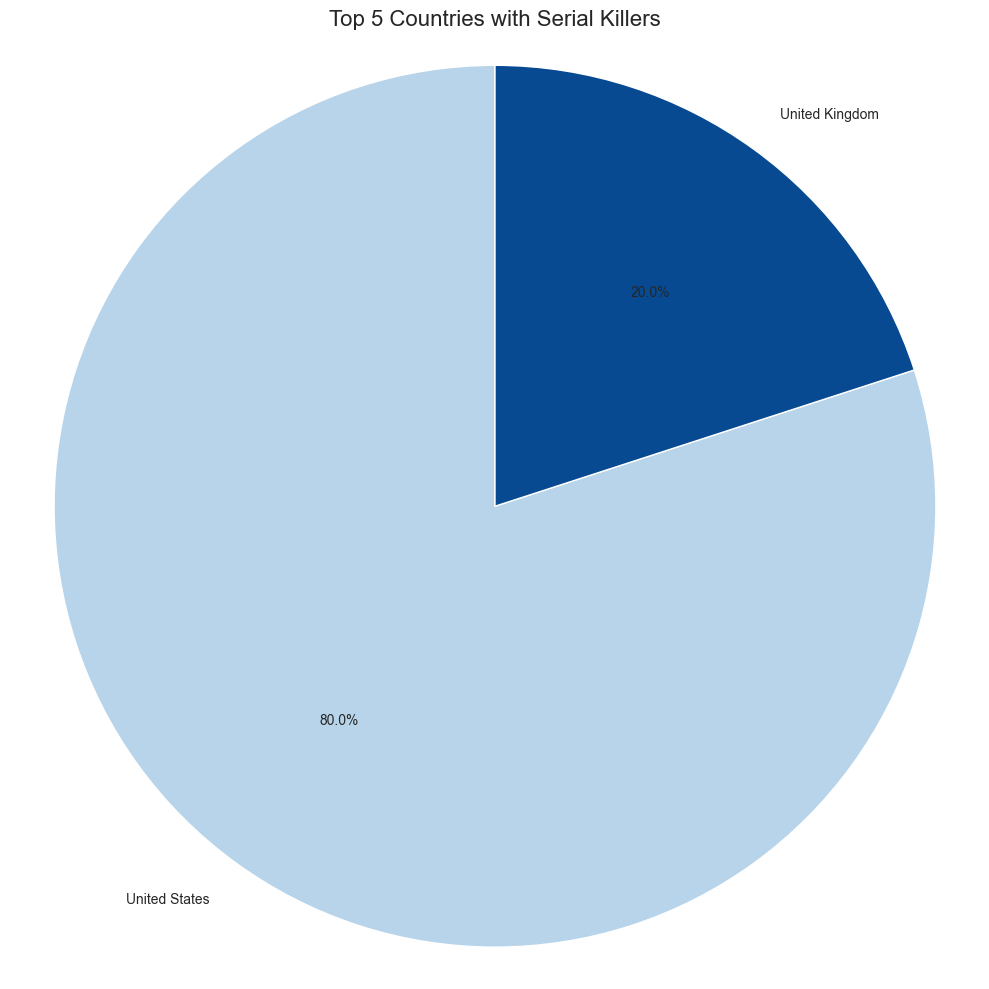

In [23]:
# Plot top 5 countries with serial killers
country_counts = df["country"].value_counts().head(5)
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(country_counts))))
plt.title("Top 5 Countries with Serial Killers", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig("serial_killer_figures/top5_countries.png")
plt.show()

## Victims by Decade

Analysis of how the number of serial killer victims has changed over different decades.

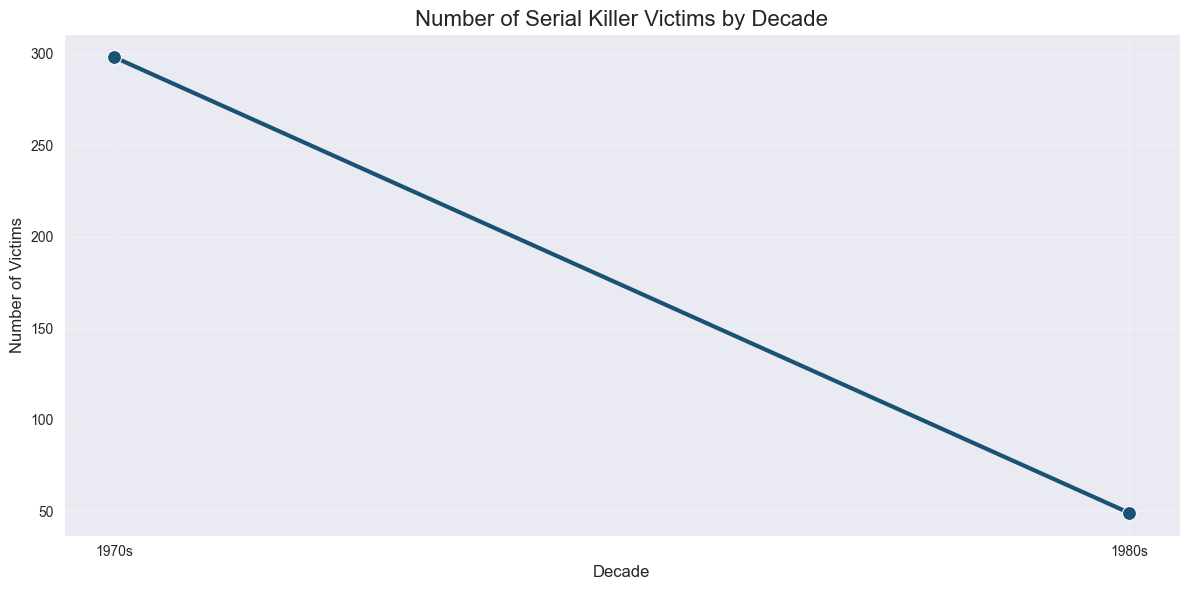

In [24]:
# Plot victims by decade
# Create a decade column
df["decade"] = (df["year_first_kill"] // 10) * 10
decade_victims = df.groupby("decade")["proven_victims"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="decade", y="proven_victims", data=decade_victims, marker='o', 
             color='#1A5276', linewidth=3, markersize=10)

# Format x-axis ticks to display decades properly
from matplotlib.ticker import FuncFormatter

def decade_formatter(x, pos):
    return f"{int(x)}s"

plt.gca().xaxis.set_major_formatter(FuncFormatter(decade_formatter))

# Add more styling
plt.title("Number of Serial Killer Victims by Decade", fontsize=16)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.grid(True, alpha=0.3)

# Ensure x-axis ticks are on decades only, not automatically generated
plt.xticks(decade_victims["decade"])

plt.tight_layout()
plt.savefig("serial_killer_figures/victims_by_decade.png")
plt.show()

## Killing Methods Distribution

Examination of the most common methods used by serial killers.

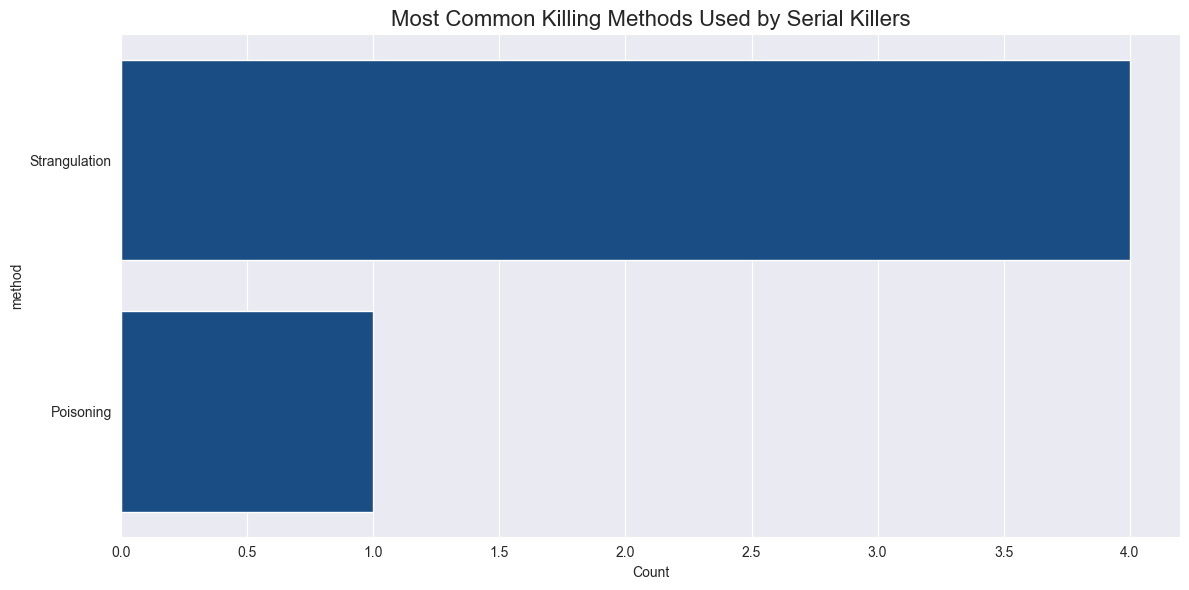

In [25]:
# Plot killing methods distribution
method_counts = df["method"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=method_counts.values, y=method_counts.index)
plt.title("Most Common Killing Methods Used by Serial Killers", fontsize=16)
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("serial_killer_figures/methods_distribution.png")
plt.show()

## Age at First Kill Distribution

Analysis of the age distribution when serial killers committed their first murder.

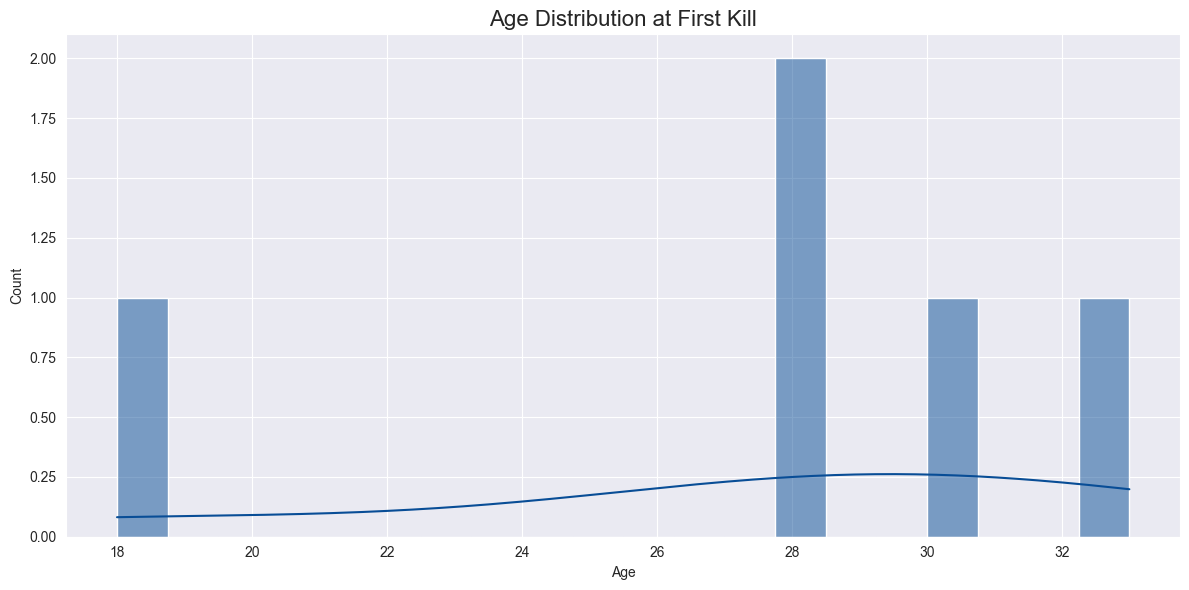

In [26]:
# Plot age at first kill distribution
plt.figure(figsize=(12, 6))
sns.histplot(df["age_first_kill"], bins=20, kde=True)
plt.title("Age Distribution at First Kill", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("serial_killer_figures/age_distribution.png")
plt.show()

## Key Findings

- Harold Shipman (UK) and Luis Garavito (Colombia) stand out with the highest number of proven victims
- Within the US, Gary Ridgway, John Wayne Gacy, and Ted Bundy are among the most deadly serial killers
- The United States has the highest number of documented serial killers in the dataset
- The 1970s appears to be the decade with the highest number of serial killer victims
- Shooting and strangulation are the most common methods used by serial killers
- Most serial killers in the dataset committed their first murder between the ages of 25-35